# Kaggle Titanic: Machine Learning from Disaster

## MIT License

### Copyright (c) 2020 Kunal Gehlot

```
Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```

### References:
 - [Titanic Tutorial](https://www.kaggle.com/alexisbcook/titanic-tutorial)
 - [Introduction to Ensembling/Stacking in Python](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

In [2]:
for directory, _, files in os.walk('data'):
    for f in files:
        print(os.path.join(directory, f))

data/train.csv
data/test.csv
data/gender_submission.csv


In [3]:
train_df = pd.read_csv('data/train.csv')
display(train_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df = pd.read_csv('data/test.csv')
display(test_df.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
display(train_df.describe())
print('=' * 90)
display(test_df.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
display(train_df.info())
print('=' * 65)
display(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

In [7]:
test_id = test_df['PassengerId']

In [8]:
test_id[:5]

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [9]:
dataList = [train_df, test_df]

In [10]:
for df in dataList:
    df['hasCabin'] = df['Cabin'].apply(lambda x : 0 if type(x) == float else 1)
    df.drop('Cabin', axis = 1, inplace = True)

In [11]:
ageVals = []

for df in dataList:
    ageVals.append([
        df['Age'].mean(), 
        df['Age'].std()
        ])

ageVals.append(
    list(
        np.random.randint(
            ageVals[0][0] - ageVals[0][1], 
            ageVals[0][0] + ageVals[0][1], 
            size = train_df['Age'].isnull().sum()
            )))

ageVals.append(
    list(
        np.random.randint(
            ageVals[1][0] - ageVals[1][1], 
            ageVals[1][0] + ageVals[1][1], 
            size = test_df['Age'].isnull().sum()
            )))

In [13]:
def get_title(name):
    for word in name.split():
        if word.endswith('.'):
            return(word[:-1])

In [14]:
for ds in dataList:
    ds['Title'] = ds['Name'].apply(get_title)
    ds['nameLen'] = ds['Name'].apply(len)
    ds['Title'].replace((['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare'), inplace = True)
    ds['Title'].replace('Mlle', 'Miss', inplace = True)
    ds['Title'].replace('Ms', 'Miss', inplace = True)
    ds['Title'].replace('Mme', 'Mrs', inplace = True)
    display(ds['Title'])

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object

In [15]:
title_maps = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for ds in dataList:
    ds['Title'] = ds['Title'].map(title_maps)
    ds['Title'] = ds['Title'].fillna(0)
    ds['Title'] = ds['Title'].astype(int)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    category
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     889 non-null    object  
 11  hasCabin     891 non-null    int64   
 12  Title        891 non-null    int64   
 13  nameLen      891 non-null    int64   
dtypes: category(1), float64(1), int64(8), object(4)
memory usage: 91.9+ KB


In [12]:
train_df['Age'][np.isnan(train_df['Age'])] = ageVals[2]
test_df['Age'][test_df['Age'].isnull()] = ageVals[3]

for df in dataList:
    display(pd.cut(df['Age'], 8))
    df['Age'] = pd.cut(df['Age'], 8, labels=[0,1,2,3,4,5,6,7])
    print('=' * 45)

0      (20.315, 30.263]
1       (30.263, 40.21]
2      (20.315, 30.263]
3       (30.263, 40.21]
4       (30.263, 40.21]
             ...       
886    (20.315, 30.263]
887    (10.368, 20.315]
888    (20.315, 30.263]
889    (20.315, 30.263]
890     (30.263, 40.21]
Name: Age, Length: 891, dtype: category
Categories (8, interval[float64]): [(0.34, 10.368] < (10.368, 20.315] < (20.315, 30.263] < (30.263, 40.21] < (40.21, 50.158] < (50.158, 60.105] < (60.105, 70.052] < (70.052, 80.0]]

0      (28.606, 38.085]
1      (38.085, 47.564]
2      (57.043, 66.521]
3      (19.128, 28.606]
4      (19.128, 28.606]
             ...       
413    (19.128, 28.606]
414    (38.085, 47.564]
415    (38.085, 47.564]
416    (38.085, 47.564]
417    (38.085, 47.564]
Name: Age, Length: 418, dtype: category
Categories (8, interval[float64]): [(0.0942, 9.649] < (9.649, 19.128] < (19.128, 28.606] < (28.606, 38.085] < (38.085, 47.564] < (47.564, 57.043] < (57.043, 66.521] < (66.521, 76.0]]

In [17]:
train_df.dropna(inplace = True)

for df in dataList:
    df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    df['familySize'] = df['SibSp'] + df['Parch'] + 1

Using 25th, 50th and 75th percentile to create ranges of Fare

In [18]:
test_df['Fare'] = test_df['Fare'].fillna(32.2)

for df in dataList:
    df.loc[df['Fare'] <= 7.91, 'Fare'] = 0
    df.loc[
        (df['Fare'] > 7.91)
        & (df['Fare'] <= 14.45),
        'Fare'] = 1
    df.loc[
        (df['Fare'] > 14.45)
        & (df['Fare'] <= 31),
        'Fare'] = 2
    df.loc[df['Fare'] > 31, 'Fare'] = 3

    df['Fare'] = df['Fare'].astype(int)

Progress so far

In [19]:
dropVals = ['PassengerId', 'Name', 'Ticket', 'SibSp']

for df in dataList:
    df.drop(dropVals, axis = 1, inplace = True)

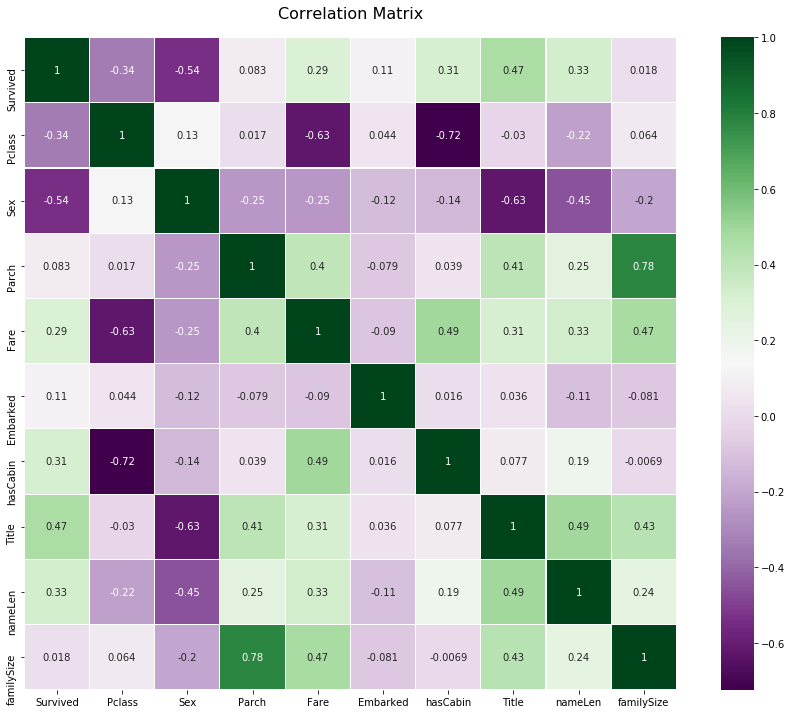

In [21]:
colors = plt.cm.PRGn
correlation = train_df.corr()
plt.figure(figsize = (16,12))
plt.title("Correlation Matrix", y = 1.02, size = 16)
sns.heatmap(
    correlation, linewidths = 0.12, 
    vmax = 1.0, square = True, 
    cmap = colors, linecolor = 'white',
    annot = True
    )
plt.show()

In [20]:
for df in dataList:
    display(df.head())
    print('=' * 55)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,hasCabin,Title,nameLen,familySize
0,0,3,1,2,0,0,0,0,1,23,2
1,1,1,0,3,0,3,1,1,3,51,2
2,1,3,0,2,0,1,0,0,2,22,1
3,1,1,0,3,0,3,0,1,3,44,2
4,0,3,1,3,0,1,0,0,1,24,1


,Pclass,Sex,Age,Parch,Fare,Embarked,hasCabin,Title,nameLen,familySize
0,3,1,3,0,0,2,0,1,16,1
1,3,0,4,0,0,0,0,3,32,2
2,2,1,6,0,1,2,0,1,25,1
3,3,1,2,0,1,0,0,1,16,1
4,3,0,2,1,1,0,0,3,44,3
